# Downloading and preprocessing structured housing data

Download structured housing data from WPRDC.

Link to data: https://data.wprdc.org/dataset/property-data-with-geographic-identifiers/resource/2072321e-aa7c-486d-8b14-8ae79363cb68

### Import packages

In [1]:
import os
import json
from collections import Counter
import warnings
warnings.filterwarnings(action="ignore")

from keras.utils import get_file  # downloading files
import pandas as pd               # general data processing
import matplotlib.pyplot as plt   # plotting
import numpy as np                # math and calculations
import plotly.express as px       # visualizations

Definde constants.

- ``PATH``: Path to the base data folder

In [2]:
PATH = "C:/Users/Tim/.keras/datasets/wikipedia_real_estate/"

Download data. If already downloaded, load data.

In [3]:
f_path = get_file(PATH + "wprdc/structured_data.csv", "https://tools.wprdc.org/downstream/2072321e-aa7c-486d-8b14-8ae79363cb68")

In [4]:
df = pd.read_csv(f_path)
print(df.shape)
df.head(10)

(575725, 89)


,_id,PARID,PROPERTYHOUSENUM,PROPERTYFRACTION,PROPERTYADDRESS,PROPERTYCITY,PROPERTYSTATE,PROPERTYUNIT,PROPERTYZIP,MUNICODE,...,HEATINGCOOLINGDESC,FIREPLACES,BSMTGARAGE,FINISHEDLIVINGAREA,CARDNUMBER,ALT_ID,TAXYEAR,ASOFDATE,latitude,longitude
0,345109,0073S00154000000,42.0,,MCKINNIE AVE,MC KEES ROCKS,PA,,15136,949,...,Central Heat,0.0,0.0,1556.0,1.0,NaN,2020,2020-12-01,40.473919,-80.067703
1,161434,0737K00129000000,3006.0,,LEECHBURG RD,PITTSBURGH,PA,,15239,880,...,Central Heat with AC,1.0,1.0,1794.0,1.0,NaN,2020,2020-12-01,40.494935,-79.775101
2,161445,1511J00387000000,2134.0,,SAXONBURG BLVD,CHESWICK,PA,,15024,952,...,Central Heat with AC,0.0,2.0,1834.0,1.0,NaN,2020,2020-12-01,40.622592,-79.866548
3,161451,0739F00352000000,536.0,,DEBORAH JANE DR,PITTSBURGH,PA,,15239,880,...,Central Heat with AC,0.0,2.0,1484.0,1.0,NaN,2020,2020-12-01,40.478839,-79.775397
4,161455,0363S00210000000,720.0,,PLUM ST,OAKMONT,PA,,15139,845,...,NaN,NaN,NaN,NaN,NaN,NaN,2020,2020-12-01,40.511660,-79.835996
5,191143,0061A00233000100,0.0,,DUNSTER ST,PITTSBURGH,PA,,15226,119,...,NaN,NaN,NaN,NaN,NaN,NaN,2020,2020-12-01,40.402157,-80.012926
6,191144,0016L00143000000,1122.0,,LOWENHILL ST,PITTSBURGH,PA,,15216,119,...,Central Heat,0.0,1.0,1635.0,1.0,NaN,2020,2020-12-01,40.417222,-80.022065
7,275858,0001D00145000000,433.0,,MARKET ST,PITTSBURGH,PA,,15222,101,...,NaN,NaN,NaN,NaN,NaN,NaN,2020,2020-12-01,40.441135,-80.002518
8,161483,0643L00312000000,0.0,,VALLEY AVE,WILMERDING,PA,,15148,861,...,NaN,NaN,NaN,NaN,NaN,NaN,2020,2020-12-01,40.388649,-79.790586
9,161490,1238L00226000000,5049.0,,BAHAMA DR,PITTSBURGH,PA,,15239,880,...,Central Heat with AC,0.0,1.0,1632.0,1.0,NaN,2020,2020-12-01,40.486942,-79.707312


## Visualizing basic spatial membership

Create histogram for showing distribution of membership for different levels of aggregated zones.

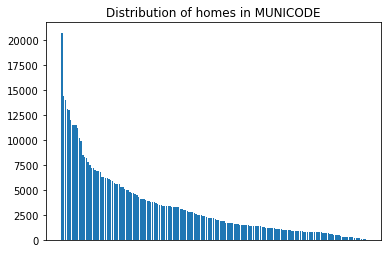

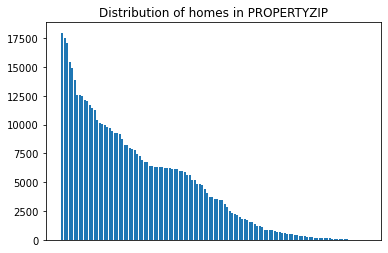

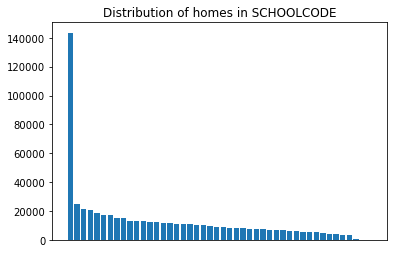

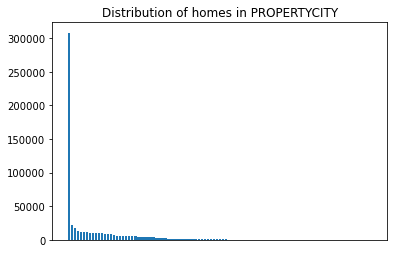

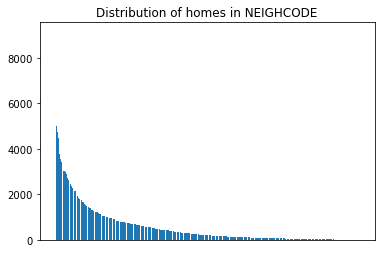

In [5]:
for zone in ["MUNICODE", "PROPERTYZIP", "SCHOOLCODE", "PROPERTYCITY", "NEIGHCODE"]:
    counts = df[zone].value_counts()
    plt.bar([str(x) for x in counts.index], counts.values)
    plt.title(f"Distribution of homes in {zone}")
    ax = plt.gca()
    ax.axes.xaxis.set_ticks([])
    plt.show()

Infer districts from municipalities and display number of houses in each district

In [6]:
# load conversion file
with open("districts_conversion.json") as f:
    district_conversion = json.load(f)

df["MUNIDESC"] = df["MUNIDESC"].apply(lambda x: x[:-2])  # remove hanging spaces
df["MUNIDESC"] = df["MUNIDESC"].apply(lambda x: x.replace("  ", " "))  # remove double space with single space 
df["DISTRICT"] = df["MUNIDESC"].apply(lambda x: district_conversion[x])  # infer districts from municipality
df["DISTRICT"].value_counts()  # display number of houses in each district

district_9     52958
district_13    49134
district_7     47951
district_4     47332
district_12    45938
district_3     45447
district_8     44718
district_1     44521
district_6     43465
district_2     41743
district_10    38917
district_11    38234
district_5     35367
Name: DISTRICT, dtype: int64

Show all columns

In [7]:
df.columns

Index(['_id', 'PARID', 'PROPERTYHOUSENUM', 'PROPERTYFRACTION',
       'PROPERTYADDRESS', 'PROPERTYCITY', 'PROPERTYSTATE', 'PROPERTYUNIT',
       'PROPERTYZIP', 'MUNICODE', 'MUNIDESC', 'SCHOOLCODE', 'SCHOOLDESC',
       'LEGAL1', 'LEGAL2', 'LEGAL3', 'NEIGHCODE', 'NEIGHDESC', 'TAXCODE',
       'TAXDESC', 'TAXSUBCODE', 'TAXSUBCODE_DESC', 'OWNERCODE', 'OWNERDESC',
       'CLASS', 'CLASSDESC', 'USECODE', 'USEDESC', 'LOTAREA', 'HOMESTEADFLAG',
       'CLEANGREEN', 'FARMSTEADFLAG', 'ABATEMENTFLAG', 'RECORDDATE',
       'SALEDATE', 'SALEPRICE', 'SALECODE', 'SALEDESC', 'DEEDBOOK', 'DEEDPAGE',
       'PREVSALEDATE', 'PREVSALEPRICE', 'PREVSALEDATE2', 'PREVSALEPRICE2',
       'CHANGENOTICEADDRESS1', 'CHANGENOTICEADDRESS2', 'CHANGENOTICEADDRESS3',
       'CHANGENOTICEADDRESS4', 'COUNTYBUILDING', 'COUNTYLAND', 'COUNTYTOTAL',
       'COUNTYEXEMPTBLDG', 'LOCALBUILDING', 'LOCALLAND', 'LOCALTOTAL',
       'FAIRMARKETBUILDING', 'FAIRMARKETLAND', 'FAIRMARKETTOTAL', 'STYLE',
       'STYLEDESC', 'STORIES', 

Some columns are basically empty, remove these rows. To find all columns with missing values, replace only whitespace cells with NaN.

In [8]:
df = df.replace(r"^\s*$", np.nan, regex=True)  # replace only white space cells with NaNs

print(f"Number of rows: {df.shape[0]}")
empty_rows = ["PROPERTYFRACTION", "PROPERTYUNIT", "TAXSUBCODE", "TAXSUBCODE_DESC", "CLEANGREEN", "FARMSTEADFLAG",
              "ABATEMENTFLAG", "ALT_ID", "PREVSALEDATE", "PREVSALEPRICE", "PREVSALEDATE2", "PREVSALEPRICE2"]
df[empty_rows].isna().sum()

Number of rows: 575725


PROPERTYFRACTION    567542
PROPERTYUNIT        568208
TAXSUBCODE          574022
TAXSUBCODE_DESC     574022
CLEANGREEN          575719
FARMSTEADFLAG       574038
ABATEMENTFLAG       575147
ALT_ID              549468
PREVSALEDATE        198779
PREVSALEPRICE       200444
PREVSALEDATE2       374213
PREVSALEPRICE2      374796
dtype: int64

There are additional columns which contain no valuable information for sale price estimation. We also remove rows containing geographic information.

In [9]:
cols_to_del = ["PARID", "PROPERTYHOUSENUM", "PROPERTYFRACTION", "PROPERTYADDRESS", "PROPERTYCITY", "PROPERTYSTATE",
               "MUNIDESC", "SCHOOLDESC", "LEGAL1", "LEGAL2", "LEGAL3", "NEIGHDESC",
               "DEEDBOOK", "DEEDPAGE", "RECORDDATE",
               "CHANGENOTICEADDRESS1", "CHANGENOTICEADDRESS2", "CHANGENOTICEADDRESS3", "CHANGENOTICEADDRESS4", "COUNTYBUILDING",
               "COUNTYLAND", "COUNTYTOTAL", "COUNTYEXEMPTBLDG", "LOCALBUILDING", "LOCALLAND", "LOCALTOTAL",
               "FAIRMARKETBUILDING", "FAIRMARKETLAND", "TAXYEAR", "ASOFDATE"]
cols_to_del.extend(empty_rows)  # append empty rows to cols to delete

In [10]:
print(*cols_to_del, sep=", ")

PARID, PROPERTYHOUSENUM, PROPERTYFRACTION, PROPERTYADDRESS, PROPERTYCITY, PROPERTYSTATE, MUNIDESC, SCHOOLDESC, LEGAL1, LEGAL2, LEGAL3, NEIGHDESC, DEEDBOOK, DEEDPAGE, RECORDDATE, CHANGENOTICEADDRESS1, CHANGENOTICEADDRESS2, CHANGENOTICEADDRESS3, CHANGENOTICEADDRESS4, COUNTYBUILDING, COUNTYLAND, COUNTYTOTAL, COUNTYEXEMPTBLDG, LOCALBUILDING, LOCALLAND, LOCALTOTAL, FAIRMARKETBUILDING, FAIRMARKETLAND, TAXYEAR, ASOFDATE, PROPERTYFRACTION, PROPERTYUNIT, TAXSUBCODE, TAXSUBCODE_DESC, CLEANGREEN, FARMSTEADFLAG, ABATEMENTFLAG, ALT_ID, PREVSALEDATE, PREVSALEPRICE, PREVSALEDATE2, PREVSALEPRICE2


In [11]:
df_sliced = df.drop(cols_to_del, axis=1)

Focus on single family, residential homes

In [12]:
print(f"Shape before: {df_sliced.shape}")
df_residential = df_sliced[(df_sliced["USEDESC"] == "SINGLE FAMILY") & (df_sliced["OWNERDESC"] != "CORPORATION")]
df_residential.drop(["USECODE", "USEDESC"], axis=1, inplace=True)  # after filterting, column becomes obsolete
print(f"Shape after:  {df_residential.shape}")
print(f"Removed {df_sliced.shape[0] - df_residential.shape[0]} rows")

Shape before: (575725, 49)
Shape after:  (348607, 47)
Removed 227118 rows


Calculate basic summary statistics.

In [13]:
df_residential[["LOTAREA", "SALEPRICE", "FAIRMARKETTOTAL", "STORIES", "TOTALROOMS", "BEDROOMS", "FULLBATHS", "HALFBATHS",
                "FIREPLACES", "FINISHEDLIVINGAREA"]].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LOTAREA,348607.0,17290.493714,69860.320997,0.0,4851.0,8250.0,14328.5,7030584.0
SALEPRICE,348084.0,100845.632910,285777.808236,0.0,1.0,58896.5,140000.0,112000000.0
FAIRMARKETTOTAL,348607.0,142344.145958,128617.909989,0.0,68300.0,110100.0,171100.0,4370000.0
STORIES,348571.0,1.596648,0.496070,1.0,1.0,2.0,2.0,4.0
TOTALROOMS,348532.0,6.427413,1.444668,0.0,6.0,6.0,7.0,87.0
BEDROOMS,348544.0,3.038586,0.789285,0.0,3.0,3.0,3.0,12.0
FULLBATHS,348500.0,1.426525,0.643051,0.0,1.0,1.0,2.0,12.0
HALFBATHS,346305.0,0.509406,0.571067,0.0,0.0,0.0,1.0,8.0
FIREPLACES,328261.0,0.418051,0.560588,0.0,0.0,0.0,1.0,12.0
FINISHEDLIVINGAREA,348572.0,1678.678273,771.826889,20.0,1176.0,1485.0,1980.0,18840.0


We can see, that one house propesedly has 87 rooms, which seems very unlikely for a single family house. More than 20 rooms or less than 1 bedroom for a single family home seems unreasonable.

In [14]:
df_residential = df_residential[df_residential["TOTALROOMS"] <= 20]
df_residential = df_residential[df_residential["BEDROOMS"] >= 1]

Geographic distribution of homes.

<Figure size 432x288 with 0 Axes>

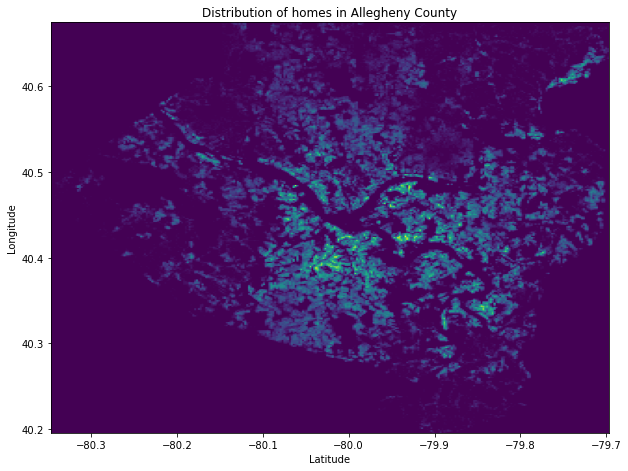

In [15]:
heatmap, xedges, yedges = np.histogram2d(list(df_residential["longitude"]), list(df_residential["latitude"]), bins=300)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.title("Distribution of homes in Allegheny County")
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.savefig("visualizations/geo_dist_homes.png", dpi=300)
plt.show()

Some variables have pretty far outliers, which is especially important for the price. We can also see, that the `SALEPRICE` seems to be very far below the `FAIRMARKETTOTAL`, which could be due to incorrect sales data.

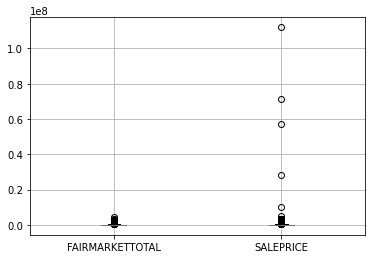

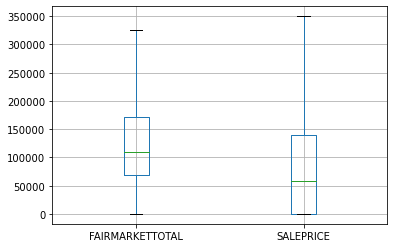

Correlation: 0.35


In [16]:
boxplot1 = df_residential.boxplot(column=['FAIRMARKETTOTAL', 'SALEPRICE'], showfliers=True)
plt.ticklabel_format(style='sci', axis='y')
plt.savefig("visualizations/boxplot_label_fliers.png")
plt.show()
boxplot2 = df_residential.boxplot(column=['FAIRMARKETTOTAL', 'SALEPRICE'], showfliers=False)
plt.ticklabel_format(style='sci', axis='y')
plt.savefig("visualizations/boxplot_label_no_fliers.png")
plt.show()

corr_pre = df_residential["FAIRMARKETTOTAL"].corr(df_residential["SALEPRICE"])
print(f"Correlation: {round(corr_pre, 2)}")

Only focus on valid sales. We can see that the distribution has gotten more similar and the lower quartile is not at 0 anymore. The correlation between both measures has also increased.

New shape: (100917, 45)


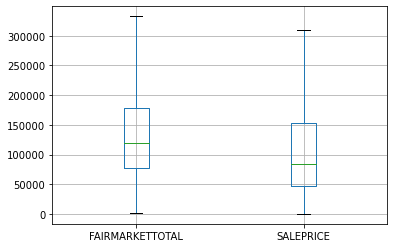

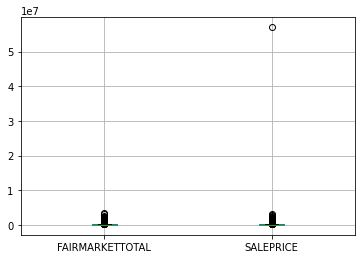

Correlation after focussing on valid sales is 0.48, increased by 0.13


In [17]:
df_cor_sales = df_residential[df_residential["SALEDESC"] == "VALID SALE"]
df_cor_sales.drop(["SALECODE", "SALEDESC"], axis=1, inplace=True)  # after filterting, column becomes obsolete
print(f"New shape: {df_cor_sales.shape}")
boxplot3 = df_cor_sales.boxplot(column=['FAIRMARKETTOTAL', 'SALEPRICE'], showfliers=False)
plt.show()
boxplot4 = df_cor_sales.boxplot(column=['FAIRMARKETTOTAL', 'SALEPRICE'], showfliers=True)
plt.show()
corr_after = df_cor_sales["FAIRMARKETTOTAL"].corr(df_cor_sales["SALEPRICE"])
print(f"Correlation after focussing on valid sales is {round(corr_after,2)}, increased by {round(corr_after-corr_pre, 2)}")

We can see that there is a clear outlier, which does not seem to belong, correct that. We still have many outliers, but we can at least see the box now.

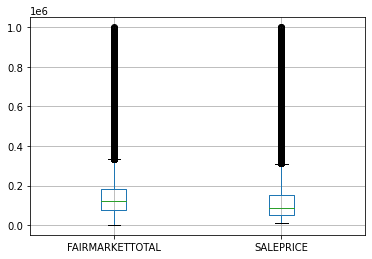

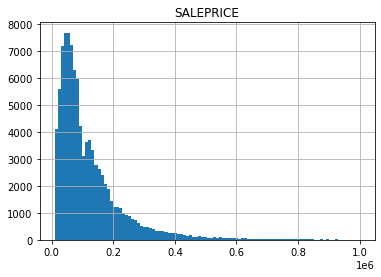

In [18]:
df_cor_sales = df_cor_sales[df_cor_sales["SALEPRICE"] < 1000000]  # sale price over 1 million are special cases
df_cor_sales = df_cor_sales[df_cor_sales["FAIRMARKETTOTAL"] < 1000000]  # houses estimated over 1 million are special cases

df_cor_sales = df_cor_sales[df_cor_sales["SALEPRICE"] > 10000]  # sale prices under 10.000 dollars almost impossible
boxplot5 = df_cor_sales.boxplot(column=["FAIRMARKETTOTAL", "SALEPRICE"], showfliers=True)
plt.show()
histogram = df_cor_sales.hist(column=["SALEPRICE"], bins=100)
plt.show()

After removing a lot of rows and only focussing on valid sales, we only have a few NaN values left. We can safely omit all rows with missing values without losing too many observations and create a clean data set.

In [19]:
print(f"Shape before: {df_cor_sales.shape}")
df_clean = df_cor_sales.dropna()
print(f"Shape after:  {df_clean.shape}")
print(f"Removed {df_cor_sales.shape[0] - df_clean.shape[0]} rows")

Shape before: (98637, 45)
Shape after:  (78774, 45)
Removed 19863 rows


Make a copy of the data at this point for visualizations

In [20]:
df_clean.to_csv(PATH + "structured_visualization.csv", index=None)

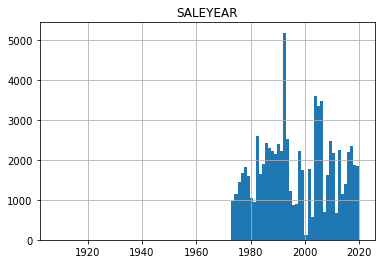

In [21]:
df_clean["SALEYEAR"] = df_clean["SALEDATE"].apply(lambda x: int(x[-4:]))
histogram = df_clean.hist(column=["SALEYEAR"], bins=100)
plt.show()

(9649, 46)


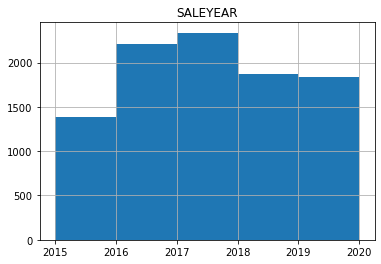

In [22]:
df_clean = df_clean[(2015 <= df_clean["SALEYEAR"]) & (df_clean["SALEYEAR"] <= 2020)]
print(df_clean.shape)
histogram = df_clean.hist(column=["SALEYEAR"], bins=5)
plt.show()

## Categorical variables

Since we have a few categorical variables, we need to format them in a way that is able to be used in a machine learning algorithm. A simple way is one-hot-encoding, where a new binary column for each possible categorical value is created. Lets take a look at the remaining columns with categorical data.

The following columns have the same values in almost all rows, making them unintersting predictions. We therefore remove these columns, but also delete the few rows where there is a different value in case it is an important distinction for those few rows.

In [23]:
print(df_clean["TAXDESC"].value_counts())
df_clean = df_clean[df_clean["TAXDESC"] == "20 - Taxable"]
df_clean.drop(["TAXCODE", "TAXDESC"], axis=1, inplace=True)

20 - Taxable    9641
10 - Exempt        8
Name: TAXDESC, dtype: int64


In [24]:
print(df_clean["CLASSDESC"].value_counts())
df_clean.drop(["CLASS", "CLASSDESC"], axis=1, inplace=True)

RESIDENTIAL    9641
Name: CLASSDESC, dtype: int64


In [25]:
print(df_clean["HOMESTEADFLAG"].value_counts())
df_clean.drop(["HOMESTEADFLAG"], axis=1, inplace=True)

HOM    9641
Name: HOMESTEADFLAG, dtype: int64


In [26]:
print(df_clean["CARDNUMBER"].value_counts())
df_clean = df_clean[df_clean["CARDNUMBER"] == 1]
df_clean.drop(["CARDNUMBER"], axis=1, inplace=True)

1.0    9640
2.0       1
Name: CARDNUMBER, dtype: int64


Remaining columns

In [27]:
df_clean.columns

Index(['_id', 'PROPERTYZIP', 'MUNICODE', 'SCHOOLCODE', 'NEIGHCODE',
       'OWNERCODE', 'OWNERDESC', 'LOTAREA', 'SALEDATE', 'SALEPRICE',
       'FAIRMARKETTOTAL', 'STYLE', 'STYLEDESC', 'STORIES', 'YEARBLT',
       'EXTERIORFINISH', 'EXTFINISH_DESC', 'ROOF', 'ROOFDESC', 'BASEMENT',
       'BASEMENTDESC', 'GRADE', 'GRADEDESC', 'CONDITION', 'CONDITIONDESC',
       'CDU', 'CDUDESC', 'TOTALROOMS', 'BEDROOMS', 'FULLBATHS', 'HALFBATHS',
       'HEATINGCOOLING', 'HEATINGCOOLINGDESC', 'FIREPLACES', 'BSMTGARAGE',
       'FINISHEDLIVINGAREA', 'latitude', 'longitude', 'DISTRICT', 'SALEYEAR'],
      dtype='object')

We can now look at the important (nominal) categorical features which need to be encoded.

A special case is the saleyear. It is numeric, but the effects do not have to be linear and can be different for each year.

In [28]:
df_clean["SALEYEAR_STR"] = df_clean["SALEYEAR"].apply(lambda x: str(x))
print(df_clean["SALEYEAR_STR"].value_counts())

2017    2334
2016    2207
2018    1872
2015    1390
2020     933
2019     904
Name: SALEYEAR_STR, dtype: int64


In [29]:
print(df_clean["HEATINGCOOLINGDESC"].value_counts())
# few observations would create unnecessary columns, remove those
df_clean = df_clean[(df_clean["HEATINGCOOLINGDESC"] == "Central Heat with AC") |
                    (df_clean["HEATINGCOOLINGDESC"] == "Central Heat")]
print("After:")
print(df_clean["HEATINGCOOLINGDESC"].value_counts())

Central Heat with AC     7033
Central Heat             2550
Heat Pump with AC          14
Heat Pump                  10
Other                       9
Electric Heat with AC       8
Electric                    5
None                        4
Floor Furnace               3
Wall Furnace                2
Unit Heat                   1
Unit Heat with AC           1
Name: HEATINGCOOLINGDESC, dtype: int64
After:
Central Heat with AC    7033
Central Heat            2550
Name: HEATINGCOOLINGDESC, dtype: int64


In [30]:
print(df_clean["OWNERDESC"].value_counts())
# few observations would create unnecessary columns, remove those
df_clean = df_clean[(df_clean["OWNERDESC"] != "CORPORATION-RAILROAD") & (df_clean["OWNERDESC"] != "REGULAR-ESTATE")]
print("After:")
print(df_clean["OWNERDESC"].value_counts())

REGULAR-ETUX OR ET VIR    4276
REGULAR                   3872
REGULAR-ETAL              1434
REGULAR-ESTATE               1
Name: OWNERDESC, dtype: int64
After:
REGULAR-ETUX OR ET VIR    4276
REGULAR                   3872
REGULAR-ETAL              1434
Name: OWNERDESC, dtype: int64


In [31]:
print(df_clean["STYLEDESC"].value_counts())
# few observations would create unnecessary columns, remove those
df_clean = df_clean[(df_clean["STYLEDESC"] != "MODULAR HOME") & (df_clean["STYLEDESC"] != "MULTI-FAMILY") &
                    (df_clean["STYLEDESC"] != "CONVENTIONAL") & (df_clean["STYLEDESC"] != "LOG CABIN")]
print("After:")
print(df_clean["STYLEDESC"].value_counts())

COLONIAL         3061
RANCH            2092
OLD STYLE        1925
CAPE COD         1099
BI-LEVEL          600
SPLIT LEVEL       412
BUNGALOW          140
SEMI DETACHED     110
CONTEMPORARY       79
TUDOR              40
VICTORIAN          14
LOG CABIN           3
CONVENTIONAL        3
MULTI-FAMILY        3
MODULAR HOME        1
Name: STYLEDESC, dtype: int64
After:
COLONIAL         3061
RANCH            2092
OLD STYLE        1925
CAPE COD         1099
BI-LEVEL          600
SPLIT LEVEL       412
BUNGALOW          140
SEMI DETACHED     110
CONTEMPORARY       79
TUDOR              40
VICTORIAN          14
Name: STYLEDESC, dtype: int64


In [32]:
print(df_clean["EXTFINISH_DESC"].value_counts())
# few observations would create unnecessary columns, remove those
df_clean = df_clean[(df_clean["EXTFINISH_DESC"] != "Concrete") & (df_clean["EXTFINISH_DESC"] != "Log")]
print("After:")
print(df_clean["EXTFINISH_DESC"].value_counts())

Brick             5483
Frame             2384
Masonry FRAME     1478
Stone              160
Stucco              46
Concrete Block      16
Log                  3
Concrete             2
Name: EXTFINISH_DESC, dtype: int64
After:
Brick             5483
Frame             2384
Masonry FRAME     1478
Stone              160
Stucco              46
Concrete Block      16
Name: EXTFINISH_DESC, dtype: int64


In [33]:
print(df_clean["ROOFDESC"].value_counts())
# few observations would create unnecessary columns, remove those
df_clean = df_clean[(df_clean["ROOFDESC"] != "METAL")]
print("After:")
print(df_clean["ROOFDESC"].value_counts())

SHINGLE    8923
SLATE       542
ROLL         56
TILE         40
METAL         6
Name: ROOFDESC, dtype: int64
After:
SHINGLE    8923
SLATE       542
ROLL         56
TILE         40
Name: ROOFDESC, dtype: int64


In [34]:
print(df_clean["BASEMENTDESC"].value_counts())
# few observations would create unnecessary columns, remove those
df_clean = df_clean[(df_clean["BASEMENTDESC"] != "Slab/Piers")]
print("After:")
print(df_clean["BASEMENTDESC"].value_counts())

Full          9151
Part           304
None            82
Crawl           17
Slab/Piers       7
Name: BASEMENTDESC, dtype: int64
After:
Full     9151
Part      304
None       82
Crawl      17
Name: BASEMENTDESC, dtype: int64


Since the values of categorical columns will become column names, we should remove whitespaces.

In [35]:
to_dummy = ["HEATINGCOOLINGDESC", "OWNERDESC", "STYLEDESC", "EXTFINISH_DESC", "ROOFDESC", "BASEMENTDESC", "ROOFDESC"]

for col in to_dummy:
    df_clean.loc[:, col] = df_clean[col].str.replace(" ","")

In [36]:
to_dummy = ["SALEYEAR_STR", "HEATINGCOOLINGDESC", "OWNERDESC", "STYLEDESC", "EXTFINISH_DESC", "ROOFDESC",
            "BASEMENTDESC", "ROOFDESC"]
df_dummies = pd.get_dummies(df_clean, columns=to_dummy)

We now also need to remove now obsolote columns which were connected to the categorical columns.

In [37]:
df_dummies.drop(["OWNERCODE", "STYLE", "EXTERIORFINISH", "ROOF", "BASEMENT", "HEATINGCOOLING"], axis=1, inplace=True)

In [38]:
df_dummies.columns

Index(['_id', 'PROPERTYZIP', 'MUNICODE', 'SCHOOLCODE', 'NEIGHCODE', 'LOTAREA',
       'SALEDATE', 'SALEPRICE', 'FAIRMARKETTOTAL', 'STORIES', 'YEARBLT',
       'GRADE', 'GRADEDESC', 'CONDITION', 'CONDITIONDESC', 'CDU', 'CDUDESC',
       'TOTALROOMS', 'BEDROOMS', 'FULLBATHS', 'HALFBATHS', 'FIREPLACES',
       'BSMTGARAGE', 'FINISHEDLIVINGAREA', 'latitude', 'longitude', 'DISTRICT',
       'SALEYEAR', 'SALEYEAR_STR_2015', 'SALEYEAR_STR_2016',
       'SALEYEAR_STR_2017', 'SALEYEAR_STR_2018', 'SALEYEAR_STR_2019',
       'SALEYEAR_STR_2020', 'HEATINGCOOLINGDESC_CentralHeat',
       'HEATINGCOOLINGDESC_CentralHeatwithAC', 'OWNERDESC_REGULAR',
       'OWNERDESC_REGULAR-ETAL', 'OWNERDESC_REGULAR-ETUXORETVIR',
       'STYLEDESC_BI-LEVEL', 'STYLEDESC_BUNGALOW', 'STYLEDESC_CAPECOD',
       'STYLEDESC_COLONIAL', 'STYLEDESC_CONTEMPORARY', 'STYLEDESC_OLDSTYLE',
       'STYLEDESC_RANCH', 'STYLEDESC_SEMIDETACHED', 'STYLEDESC_SPLITLEVEL',
       'STYLEDESC_TUDOR', 'STYLEDESC_VICTORIAN', 'EXTFINISH_DESC_B

There is also a last category of categorical columns, which do not need to be encoded, since they can be interpreted on an ordinal scale (the higher/lower the number the better). The scale for some of these do not seem to make sense, so we need to adjust those. "Unsound" seems to be clearly the worst case scenario, since it implies the property should be torn down, or at least renovated from the bottom up.

In [39]:
Counter(list(zip(df_dummies["CONDITION"], df_dummies["CONDITIONDESC"])))

Counter({(3.0, 'AVERAGE'): 7673,
         (7.0, 'VERY GOOD'): 150,
         (2.0, 'GOOD'): 1252,
         (4.0, 'FAIR'): 445,
         (1.0, 'EXCELLENT'): 8,
         (5.0, 'POOR'): 24,
         (8.0, 'VERY POOR'): 1,
         (6.0, 'UNSOUND'): 1})

In [40]:
df_dummies.loc[(df_dummies["CONDITION"] >= 2) & (df_dummies["CONDITION"] <= 6), "CONDITION"] += 1  # make space for "VERY GOOD"
df_dummies.loc[df_dummies["CONDITIONDESC"] == "VERY GOOD", "CONDITION"] = 2.0  # put "VERY GOOD" as 2
df_dummies.loc[df_dummies["CONDITIONDESC"] == "VERY POOR", "CONDITION"] = 7.0  # put "VERY POOR" as 7
df_dummies.loc[df_dummies["CONDITIONDESC"] == "UNSOUND", "CONDITION"] = 8.0  # put "UNSOUND" as 8

In [41]:
# Condition is now correctly encoded
print(Counter(list(zip(df_dummies["CONDITION"], df_dummies["CONDITIONDESC"]))))
df_dummies.drop(["CONDITIONDESC"], axis=1, inplace=True)  # no use for description anymore

Counter({(4.0, 'AVERAGE'): 7673, (3.0, 'GOOD'): 1252, (5.0, 'FAIR'): 445, (2.0, 'VERY GOOD'): 150, (6.0, 'POOR'): 24, (1.0, 'EXCELLENT'): 8, (7.0, 'VERY POOR'): 1, (8.0, 'UNSOUND'): 1})


In [42]:
Counter(list(zip(df_dummies["GRADE"], df_dummies["GRADEDESC"])))

Counter({('C', 'AVERAGE'): 4013,
         ('A+', 'VERY GOOD +'): 39,
         ('C-', 'AVERAGE -'): 1552,
         ('C+', 'AVERAGE +'): 2193,
         ('D+', 'BELOW AVERAGE +'): 282,
         ('B+', 'GOOD +'): 339,
         ('B', 'GOOD'): 390,
         ('A-', 'VERY GOOD -'): 72,
         ('B-', 'GOOD -'): 492,
         ('A', 'VERY GOOD'): 79,
         ('D', 'BELOW AVERAGE'): 88,
         ('X', 'EXCELLENT'): 2,
         ('X+', 'EXCELLENT +'): 2,
         ('D-', 'BELOW AVERAGE -'): 8,
         ('X-', 'EXCELLENT -'): 3})

In [43]:
mapper = {"XX+":1, "XX":2, "XX-":3, "X+":4, "X":5, "X-":6, "A+":7, "A":8, "A-":9, "B+":10, "B":11, "B-":12, "C+":13,
          "C":14, "C-":15, "D+":16, "D":17, "D-":18, "E+":19, "E":20, "E-":21}
df_dummies.loc[:,"GRADE"] = df_dummies["GRADE"].replace(mapper)  # replace grades with their numeric counterpart

After creating an ordinal scale, we can see that the mean grade is between B+ and B, assuming differences between grades are the same across the board.

In [44]:
print(Counter(list(zip(df_dummies["GRADE"], df_dummies["GRADEDESC"]))))
df_dummies.drop(["GRADEDESC"], axis=1, inplace=True)  # no use for description anymore

Counter({(14, 'AVERAGE'): 4013, (13, 'AVERAGE +'): 2193, (15, 'AVERAGE -'): 1552, (12, 'GOOD -'): 492, (11, 'GOOD'): 390, (10, 'GOOD +'): 339, (16, 'BELOW AVERAGE +'): 282, (17, 'BELOW AVERAGE'): 88, (8, 'VERY GOOD'): 79, (9, 'VERY GOOD -'): 72, (7, 'VERY GOOD +'): 39, (18, 'BELOW AVERAGE -'): 8, (6, 'EXCELLENT -'): 3, (5, 'EXCELLENT'): 2, (4, 'EXCELLENT +'): 2})


In [45]:
Counter(list(zip(df_dummies["CDU"], df_dummies["CDUDESC"])))

Counter({('AV', 'AVERAGE'): 7452,
         ('VG', 'VERY GOOD'): 187,
         ('GD', 'GOOD'): 1333,
         ('FR', 'FAIR'): 542,
         ('PR', 'POOR'): 26,
         ('EX', 'EXCELLENT'): 11,
         ('VP', 'VERY POOR'): 3})

In [46]:
mapper = {"EX":1, "VG":2, "GD":3, "AV":4, "FR":5, "PR":6, "VP":7, "UN":8}
df_dummies.loc[:,"CDU"] = df_dummies["CDU"].replace(mapper)  # replace grades with their numeric counterpart

In [47]:
df_dummies.drop(["CDUDESC"], axis=1, inplace=True)  # no use for description anymore

View final summary statistics

In [48]:
df_dummies[["LOTAREA", "SALEPRICE", "FAIRMARKETTOTAL", "STORIES", "TOTALROOMS", "BEDROOMS",
            "FULLBATHS", "HALFBATHS", "FIREPLACES", "FINISHEDLIVINGAREA"]].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LOTAREA,9554.0,14954.361733,26749.359448,500.0,6100.0,9459.0,15000.0,897336.0
SALEPRICE,9554.0,208994.720536,136604.786161,11300.0,120000.0,173000.0,258676.0,996250.0
FAIRMARKETTOTAL,9554.0,171916.194683,116697.413846,12100.0,96200.0,139800.0,209475.0,972100.0
STORIES,9554.0,1.564423,0.495344,1.0,1.0,2.0,2.0,3.0
TOTALROOMS,9554.0,6.598074,1.381587,2.0,6.0,6.0,7.0,16.0
BEDROOMS,9554.0,3.125497,0.768132,1.0,3.0,3.0,4.0,9.0
FULLBATHS,9554.0,1.521666,0.659740,0.0,1.0,1.0,2.0,6.0
HALFBATHS,9554.0,0.603517,0.579864,0.0,0.0,1.0,1.0,3.0
FIREPLACES,9554.0,0.520934,0.576623,0.0,0.0,0.0,1.0,4.0
FINISHEDLIVINGAREA,9554.0,1700.103517,718.723981,399.0,1200.0,1518.0,2024.0,8068.0


Save preprocessed data.

In [49]:
df_dummies.to_csv(PATH + "structured_preprocessed.csv", index=None)